# Haberman's survival data set:
  The data set, contains cases from a study, that was conducted between 1958 and 1970 ,at the University of Chicago Billings Hospital, on the survival of patients, who had undergone surgery for breast cancer.


## Objective:
  To classify whether a patient survived 5 year or longer or the patient died within 5 years

### No. of instances:
306

### No. of attribute:
4(including class atribute)


## Attribute information:
        a.Age of patient at the time of operation(numerical)
        b.patient's year of operation(year-1900,numerical)
        c.no. of positive axillary nodes detected(numerical)
        d.survival status (class attribute)1=the patient survived 5 years or longer 2= the patient died within 5 years
        

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#loading haberman.csv into panda dataframe
haber= pd.read_csv("haberman.csv")

In [3]:
import os
os.getcwd()

'/Users/user/Downloads'

In [4]:
os.chdir("/Users/user/Downloads")

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#finding no. of datapoints and features
print(haber.shape)

(306, 4)


In [6]:
#finding the column names in our dataset
print(haber.columns)

Index([u'age', u'year', u'nodes', u'status'], dtype='object')


In [7]:
#to find the survival status(class attribute)
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

this shows
    1) 225 patients survived 5 years or longer
    2)81 patients died within 5 years
    

# Bi-variate analysis
# 2-D Scatter plot:
hard to classify with only one colour.


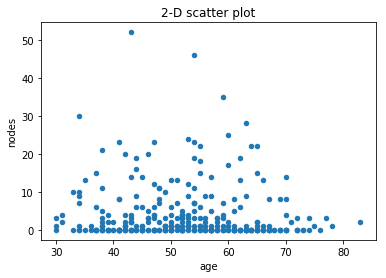

In [3]:
haber.plot(kind='scatter',x='age',y='nodes');
plt.title("2-D scatter plot")
plt.show()

# 2-D scatter with differnt colors for different survival status:


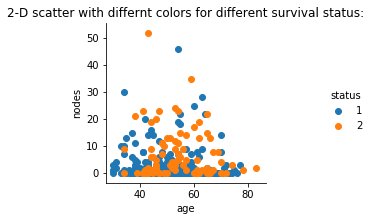

In [6]:
sns.FacetGrid(haber,hue="status",size=3).map(plt.scatter,"age","nodes").add_legend();
plt.title("2-D scatter with differnt colors for different survival status:")
plt.show()

# 2-D pair plot:
    1)suppose if there are more than 2 features , then pair plot is used ,where different pairs of features are tried.
    2)It is used to visualize the data in 2-D and it cannot be used for 3-D or 4-D etc.

Text(0.5,0.98,'2 D pair plot')

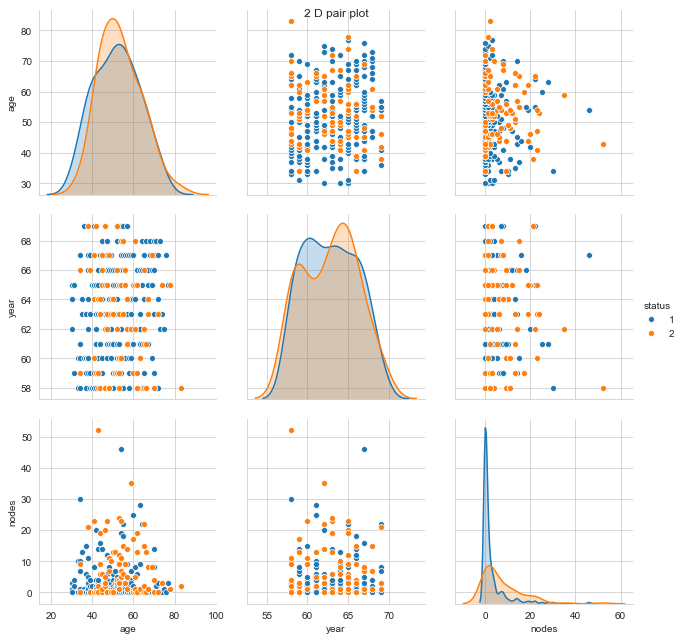

In [11]:
sns.set_style("whitegrid");a= sns.pairplot(haber, hue="status",vars=["age", "year", "nodes"], height=3);
a.fig.suptitle("2 D pair plot")


# Observation from bi-variate analysis:
    1)In plots of ,age and year data overlaps with each other.
    2)Nodes is a better attribute to classify.

# Univariate analysis:
# Histogram:

Text(0.5,1,'histogram')

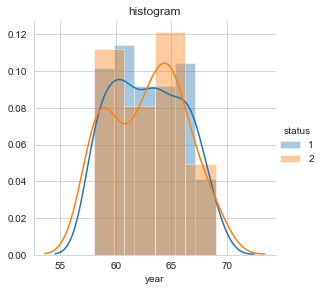

In [13]:
sns.FacetGrid(haber,hue='status',height=4).map(sns.distplot,"year").add_legend();

plt.title("histogram for year")

# Observation:
the data is overlapping so it is hard to classify 

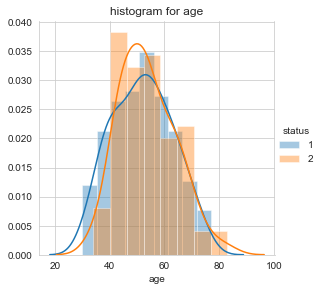

In [14]:
sns.FacetGrid(haber,hue='status',height=4).map(sns.distplot,"age").add_legend();
plt.title("histogram for age");

# Observation:
    1)Patients within age 30-34 have survived more than five years after operation.
    2)Patients within age 77-84 have not survived more than 5 years after operation.
    3)The rest of the data is overlapping.
    
    

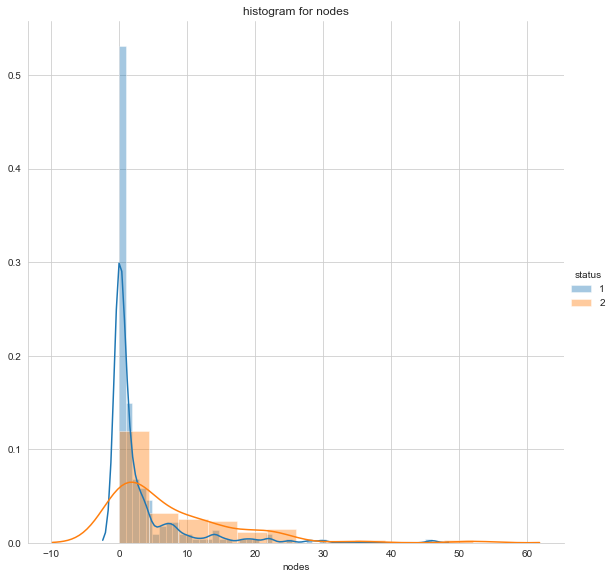

In [15]:
sns.FacetGrid(haber,hue='status',height=8).map(sns.distplot,"nodes").add_legend();
plt.title("histogram for nodes");

# Observations:
    1)As the no. of nodes increases, survival status decreases.
    2)The rest of the data is overlapping.

# Box plot and whiskers:

Text(0.5,1,'box plot and whiskers for year')

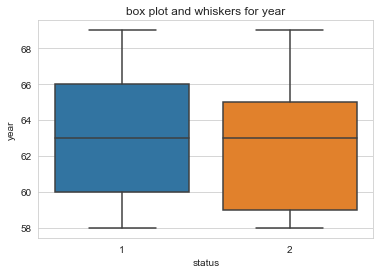

In [16]:
sns.boxplot(x='status',y='year',data=haber)
plt.title("box plot and whiskers for year")

Text(0.5,1,'box plot and whiskers for age')

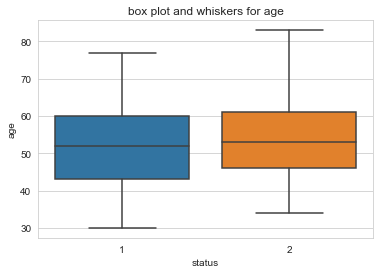

In [17]:
sns.boxplot(x='status',y='age',data=haber)
plt.title("box plot and whiskers for age")

# Observation:
    1)Patients within age 30-34 have survived more than five years after operation.
    2)Patients within age 77-83 have not survived more than five years after operation.
    

Text(0.5,1,'box plot and whiskers for nodes')

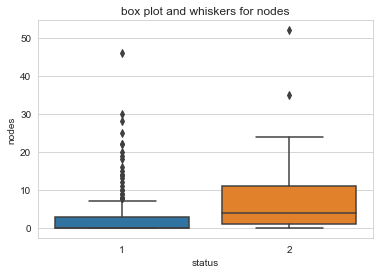

In [20]:
sns.boxplot(x='status',y='nodes',data=haber)
plt.title("box plot and whiskers for nodes")

# Observation:
    1)Patients with 0 nodes have higher chance of survival

# Violin plots:

Text(0.5,1,'violin plots for year')

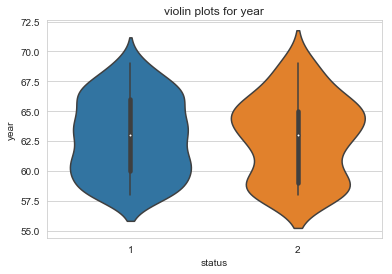

In [21]:
sns.violinplot(x='status',y='year',data=haber)
plt.title("violin plots for year")

# Observation:
    1)Hard to classify as the data is overlapping.

Text(0.5,1,'violin plot for age')

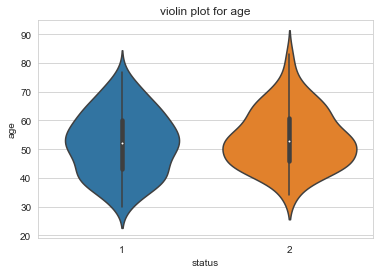

In [22]:
sns.violinplot(x='status',y='age',data=haber)
plt.title("violin plot for age")

# Observation:
    1)Hard to classify as the data is overlapping.

Text(0.5,1,'violin plot for nodes')

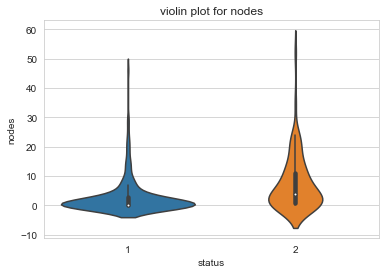

In [23]:
sns.violinplot(x='status',y='nodes',data=haber)
plt.title("violin plot for nodes")

# PDF:

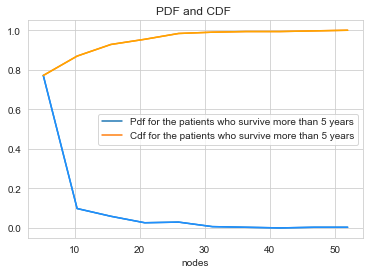

In [24]:

counts,bin_edges=np.histogram(haber['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(haber['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="dodgerblue")
plt.plot(bin_edges[1:],cdf,color="orange")
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])


plt.title("PDF and CDF ")
plt.xlabel("nodes")
plt.show()



# Mean
    

In [20]:
less_than_five=haber[haber['status']==2]
more_than_five=haber[haber['status']==1]

In [20]:
print(np.mean(more_than_five))

age       52.017778
year      62.862222
nodes      2.791111
status     1.000000
dtype: float64


In [21]:
print(np.mean(less_than_five))

age       53.679012
year      62.827160
nodes      7.456790
status     2.000000
dtype: float64


# Observation from univariate analysis:
    1)Mean age of patients who survived more than 5 years is 52 and who didnot survive is 54
    2)Patients having nodes less than 3 nodes have survived more than 5 years after operation and patients having more than 3 nodes have not survived more than 5 years
    

# Final observation
    1)Patients having lests than 3nodes have survived more than 5 years after operation .
    2)Patients having more than 3 nodes have not survived more than 5 years after operations
    3)Nodes is used to classify the survival status as the other features like age,years etc. overlap